In [2]:
import os
import numpy as np
#from top_level_features import hog_features
import time
#from top_level_features import color_histogram_hsv
#from top_level_features import extract_features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline
print("=================== Packages Loaded ===================")

C:\Users\moham\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


=================== Packages Loaded ===================


=================== Loading Data ===================
Image 1 : Ragu 	 2:Carbonara 	 3:Lasagna 	 4:gnocchi


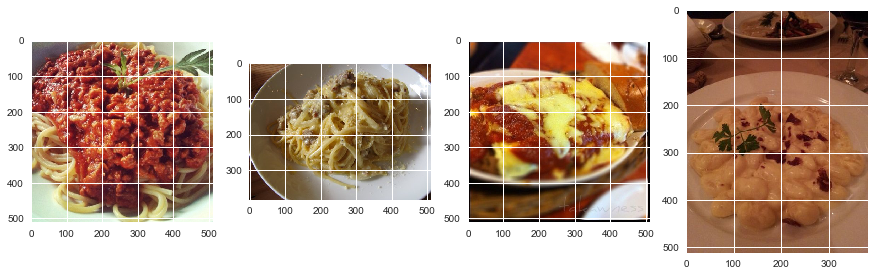

In [3]:
print("=================== Loading Data ===================")
root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'
gnocchi_dir = 'gnocchi/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))
all_gnocchi = os.listdir(os.path.join(root_dir, gnocchi_dir))

print("Image 1 : Ragu \t 2:Carbonara \t 3:Lasagna \t 4:gnocchi")
fig, ax = plt.subplots(1,4, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_carbonara)
img = plt.imread(os.path.join(root_dir, carbonara_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_lasagna)
img = plt.imread(os.path.join(root_dir, lasagna_dir, rand_img))
ax[2].imshow(img)

rand_img = np.random.choice(all_gnocchi)
img = plt.imread(os.path.join(root_dir, gnocchi_dir, rand_img))
ax[3].imshow(img)

plt.show()

In [4]:
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================


In [63]:
unique, counts = np.unique(all_labels, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 1000]
 [   1 1000]
 [   2  999]
 [   3 1000]]


In [71]:
unique, counts = np.unique(to_categorical(np.array(all_labels),num_classes=4), return_counts=True)
print (np.asarray((unique, counts)).T)

[[0.0000e+00 1.1997e+04]
 [1.0000e+00 3.9990e+03]]


In [6]:
X = np.array(all_imgs)
Y = np.array(all_labels)

In [8]:
Y

array([0, 0, 0, ..., 3, 3, 3])

In [9]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 70:30 ===================")
X = np.array(all_imgs)
Y = np.array(all_labels)
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 70:30 ===================
For Main Data Set : 3999
For Train Set : 2799
For Test Set : 1200


In [10]:
unique, counts = np.unique(Y, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 1000]
 [   1 1000]
 [   2  999]
 [   3 1000]]


### Here essentially I am running multiple SVM's for classification to find optimal c Value
> Lower C value leads to more flexiblity and leads to higher training error
>
> Higher C value leads to less flexibility and leads to lower training error

Acc Train: 0.956056, Acc Test:0.393333
Acc Train: 1.000000, Acc Test:0.377500
Acc Train: 1.000000, Acc Test:0.377500


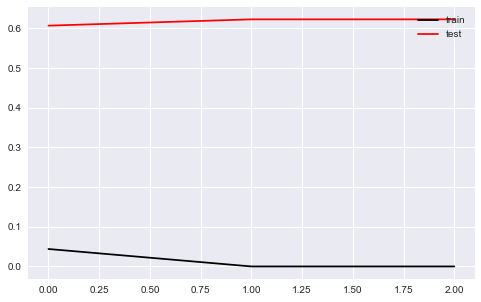

In [11]:
C_values = [0.001,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

### Performing cross validation and checking which combination of svm with a different kernel gives awesome results

In [ ]:
start_time = time.time()
models = (
          svm.SVC(kernel='rbf', C=0.001),
          svm.SVC(kernel='rbf', gamma=10, C=0.001),
          svm.SVC(kernel='sigmoid', C=0.001, gamma=0.1),
          svm.SVC(kernel='poly', degree=2, gamma=0.5, C=0.001))

X_train_s, X_val, Y_train_s, Y_val = train_test_split(x_train, y_train, test_size=0.3)

for idx,model in enumerate(models):
    model.fit(X_train_s,Y_train_s)
    tr_error = 1-model.score(X_train_s,Y_train_s)
    val_error = 1-model.score(X_val,Y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

Model:0, Train Error:0.742726, Val Error:0.763095, Test Error:0.753333
Model:1, Train Error:0.742726, Val Error:0.763095, Test Error:0.753333
Model:2, Train Error:0.742726, Val Error:0.763095, Test Error:0.753333


| Model Number | Train prediction |	Validation Prediction |	Test Prediction |
| ------------ | ---------------- | --------------------- | --------------- |
|0|	0.75855|	0.734524|	0.74667|
|1|	0.75855|	0.734524|	0.74667|
|2|	0.75855|	0.734524|	0.74667|
|3|	1|	        0.686905|	0.7325|

### Transforming data into HOG Format
Will work on Hog Error later

In [42]:
features = extract_features(X,[hog_features, color_histogram_hsv]) 
scaler = StandardScaler()
X = scaler.fit_transform(features)

x_hog_train, x_hog_test, y_hog_train, y_hog_test = train_test_split(X, Y, test_size=0.2, random_state=42)

(3999, 65, 65, 3)


TypeError: slice indices must be integers or None or have an __index__ method

In [56]:

unique, counts = np.unique(y_train, return_counts=True)

print (np.asarray((unique, counts)).T)

[[0.000e+00 2.103e+03]
 [1.000e+00 6.960e+02]]


### Running SVM on HOG data based on the winner model from above

In [43]:
clf = svm.SVC(kernel='rbf', C=0.001) 
clf.fit(x_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
start_time = time.time()

model=clf
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True       0.0  1.0
Predicted          
0.0        896  304
1.0          0    0
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.85       896
        1.0       0.00      0.00      0.00       304

avg / total       0.56      0.75      0.64      1200

0.7466666666666667
Duration: --- 1.4199337323506673 Minutes ---


In [ ]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("Cohen Kappa Score: "+str(cohen_kappa_score(y_test,pred)))

# Enough with SVMS Moving to ANN